In [8]:
import tensorflow as tf
import numpy as np 
from PIL import Image
from glob import glob
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

In [27]:
train_dir = 'D:\\computer vision\\handsdataset\\train'
test_dir = 'D:\\computer vision\\handsdataset\\test'

In [4]:
# train_gen = ImageDataGenerator(rescale=1.0/255).flow_from_directory(directory=
#                                     train_dir,
#                                     target_size=(128, 128), batch_size=32,
#                                     class_mode='categorical')

# test_gen = ImageDataGenerator(rescale=1.0/255).flow_from_directory(directory=
#                                     test_dir,
#                                     target_size=(128, 128), batch_size=32,
#                                     class_mode='categorical')

Found 2694 images belonging to 7 classes.
Found 262 images belonging to 7 classes.


In [5]:
# import os
# counts_test = []
# classes_test = []
# path = train_dir
# for class_ in os.listdir(path):
#     classes_test.append(class_)
#     counts_test.append(len(os.listdir(path+'/'+class_)))

# counts_train = []
# classes_train = []
# path = test_dir
# for class_ in os.listdir(path):
#     classes_train.append(class_)
#     counts_train.append(len(os.listdir(path+'/'+class_)))

In [6]:
# images = []
# classes = []
# for class_ in os.listdir(path):
#     for i in os.listdir(path+'/'+class_)[:3]:
#         images.append(cv2.imread(path+'/'+class_+'/'+i))
#         classes.append(class_)

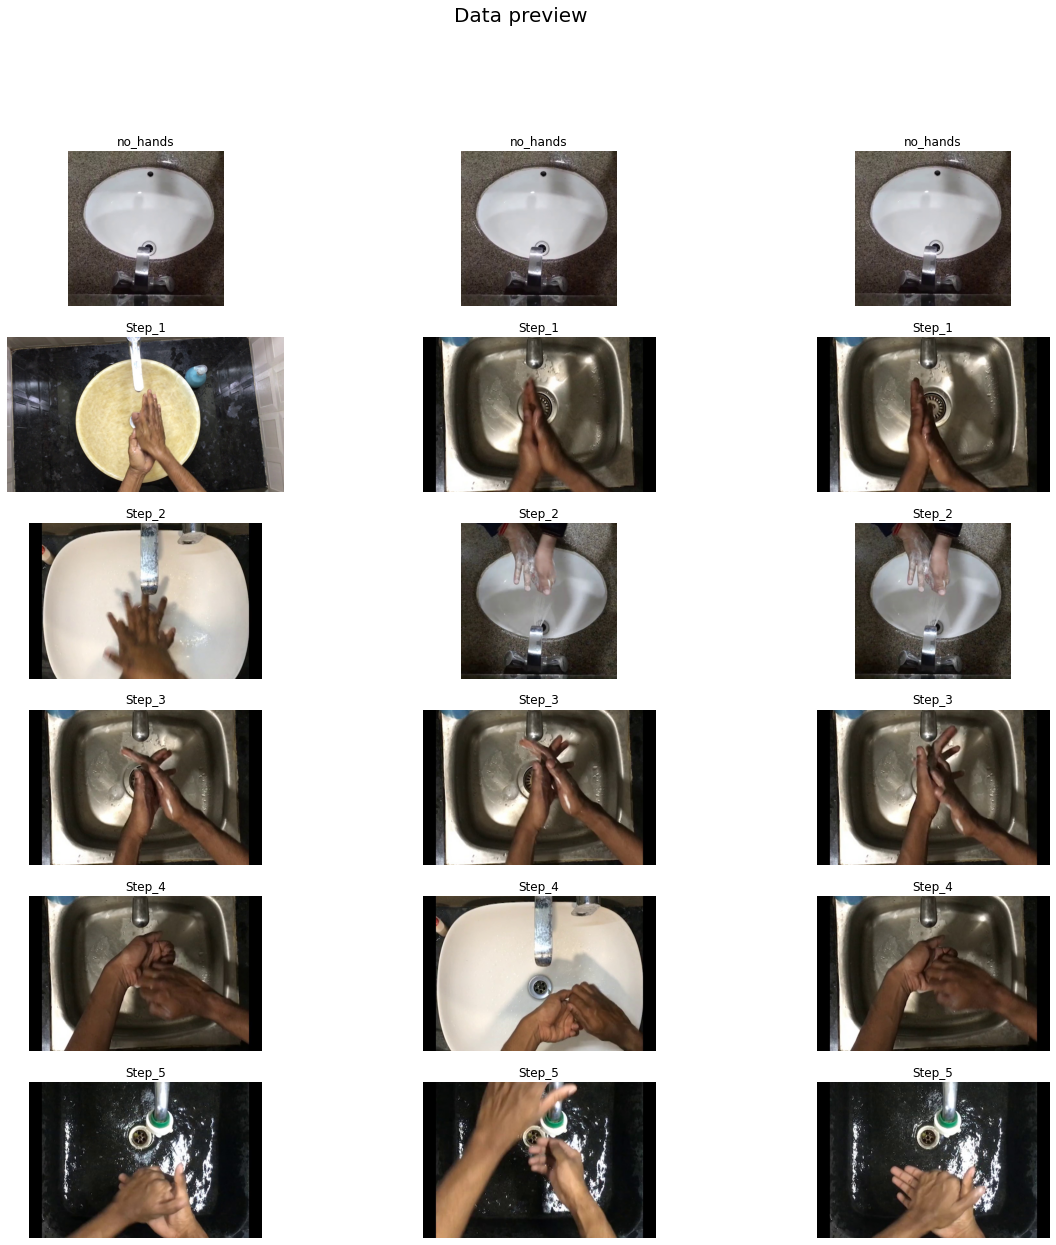

In [7]:
# fig, axes = plt.subplots(6, 3, figsize=(20, 20))
# path = train_dir

# for ax in axes.flatten():
#     index = list(axes.flatten()).index(ax)
#     img = images[index]
#     img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
#     img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#     ax.imshow(img)
#     ax.set_title(classes[index])
#     ax.axis('off')
    
# plt.suptitle('Data preview', size=20)
# plt.show()

In [61]:
# from tensorflow.keras.applications import  MobileNet, DenseNet121, InceptionV3
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.optimizers import Adam
# histories = []
# for functional in [MobileNet(include_top=False, input_shape=(128, 128, 3)), 
#                    DenseNet121(include_top=False, input_shape=(128, 128, 3)), 
#                    InceptionV3(include_top=False, input_shape=(128, 128, 3))]:
#     model = Sequential()
#     model.add(functional)
#     model.add(Flatten())
#     model.add(Dense(7, activation='softmax'))

#     model.compile(metrics='accuracy', loss='categorical_crossentropy', 
#                   optimizer=Adam(lr=0.0001))
#     histories.append(model.fit_generator(generator=train_gen, validation_data=test_gen, 
#                         steps_per_epoch=10, validation_steps=10, epochs=10))

In [ ]:
# fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# metrics = histories[0].history.keys()
# names = ['MobileNet', 'DenseNet', 'InceptionNet']

# for metric in metrics:
#     ax = axes.flatten()[list(metrics).index(metric)]
#     for history in histories:
#         ax.plot(history.history[metric], label=names[histories.index(history)])
#         ax.set_title(metric + ' over time')
#         ax.set_xlabel('epochs')
#         ax.set_ylabel(metric)
#         ax.legend()
        
# plt.show()

In [ ]:
# def image_prediction(path):
#     imm=Image.open(path)
#     imm=imm.resize((128,128))
#     x=np.array(imm)
#     x=np.expand_dims(x,axis=0)
#     classs=model.predict_classes(x)
#     l=os.listdir(train_dir)
#     l.sort()
#     return l[classs[0]]

In [ ]:
# image_ped = image_prediction('D:\\computer vision\\handsdataset\\test\\Step_6\\step_6_509.jpg')

In [ ]:
# image_ped

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2
        #vertical_flip=True
    )


training_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=32, 
        class_mode='categorical')


test_datagen = ImageDataGenerator(rescale=1./255) 
test_set = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical')

Found 7812 images belonging to 7 classes.
Found 262 images belonging to 7 classes.


In [18]:
class_names_dict=training_set.class_indices
class_names_dict

{'Step_1': 0,
 'Step_2': 1,
 'Step_3': 2,
 'Step_4': 3,
 'Step_5': 4,
 'Step_6': 5,
 'no_hands': 6}

In [19]:
import pandas as pd
class_indeces = pd.Series({v: k for k, v in class_names_dict.items()})
print(class_indeces)


0      Step_1
1      Step_2
2      Step_3
3      Step_4
4      Step_5
5      Step_6
6    no_hands
dtype: object


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten

cnn=Sequential()

cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(150,150,3))) #filters

cnn.add(MaxPool2D(pool_size=2,strides=2))

cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu')) 
cnn.add(MaxPool2D(pool_size=2,strides=2))

cnn.add(Flatten())


cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dense(units = 128, activation = 'relu'))

cnn.add(Dense(units = 7, activation = 'softmax'))

In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=5, min_lr=0.000002) #Optimizing Learning Rate
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1

In [8]:
history=cnn.fit(x=training_set,validation_data=test_set,epochs=25,callbacks=[reduce_lr,early_stop])

Epoch 1/25
245/245 [==============================] - 126s 516ms/step - loss: 1.2064 - accuracy: 0.5257 - val_loss: 1.1077 - val_accuracy: 0.6489
Epoch 2/25
245/245 [==============================] - 103s 422ms/step - loss: 0.6778 - accuracy: 0.7463 - val_loss: 0.6223 - val_accuracy: 0.7786
Epoch 3/25
245/245 [==============================] - 104s 424ms/step - loss: 0.4724 - accuracy: 0.8240 - val_loss: 0.5105 - val_accuracy: 0.8321
Epoch 4/25
245/245 [==============================] - 104s 424ms/step - loss: 0.3808 - accuracy: 0.8619 - val_loss: 0.5213 - val_accuracy: 0.8168
Epoch 5/25
245/245 [==============================] - 104s 423ms/step - loss: 0.2828 - accuracy: 0.8993 - val_loss: 0.3595 - val_accuracy: 0.8779
Epoch 6/25
245/245 [==============================] - 103s 422ms/step - loss: 0.2153 - accuracy: 0.9199 - val_loss: 0.4303 - val_accuracy: 0.8397
Epoch 7/25
245/245 [==============================] - 104s 423ms/step - loss: 0.1785 - accuracy: 0.9354 - val_loss: 0.3241 -

In [ ]:
# history1=cnn.fit(x=training_set,
#                 validation_split=0.2,
#                 epochs=25,
#                 callbacks=[reduce_lr,early_stop])

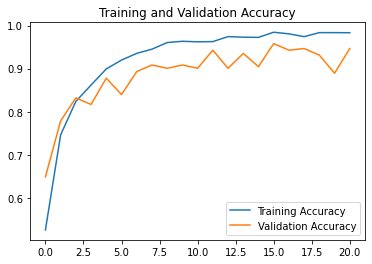

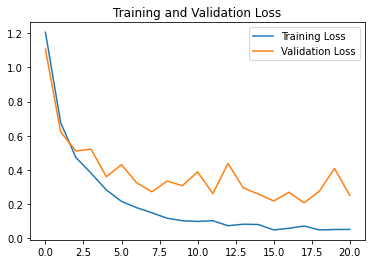

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

sns.lineplot(epochs, acc, label='Training Accuracy')
sns.lineplot(epochs, val_acc,label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

sns.lineplot(epochs, loss,label='Training Loss')
sns.lineplot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

<PIL.Image.Image image mode=RGB size=150x150 at 0x11E21804520>


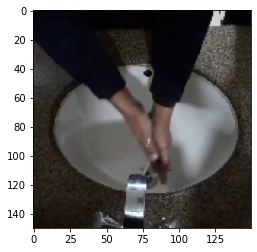

In [21]:
import glob
import random
from tensorflow.keras.preprocessing import image
test_image_random = glob.glob('D:\\computer vision\\hands\\*.jpg')
image_select = random.randint(1,len(test_image_random))
#print(type(test_image_folder))
test_image=image.load_img(test_image_random[image_select],target_size=(150,150,3))
plt.imshow(test_image)
print(test_image)

In [22]:
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict_classes(test_image)
# answer=class_indeces[result]
print(result[0])

2


In [6]:
cnn.save('new_model')

NameError: name 'cnn' is not defined

In [16]:
cnn = tf.keras.models.load_model('new_model')

In [32]:
import tensorflow as tf
new_model = 'C:\\Users\\Harshit\\Desktop\\Eli_projects\\new_model'
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(new_model) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [33]:
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()


In [51]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_details

[{'name': 'conv2d_input',
  'index': 0,
  'shape': array([  1, 150, 150,   3]),
  'shape_signature': array([ -1, 150, 150,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [1]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('new_model') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)


In [38]:
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()
cnn.evaluate_tflite("model.tflite",test_set)

AttributeError: 'Sequential' object has no attribute 'evaluate_tflite'

In [37]:
import numpy as np
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = test_image
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(list(output_data[0][:]))



[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


In [30]:
cnn.evaluate(test_set)

9/9 [==============================] - 2s 245ms/step - loss: 0.2499 - accuracy: 0.9466


[0.24985268712043762, 0.9465649127960205]

In [39]:
cnn.export(export_dir='.')

AttributeError: 'Sequential' object has no attribute 'export'